In [1]:
import numpy as np

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [3]:
# Step 2: Initialize perceptron parameters
weights = np.random.rand(2)  # Random weights for two inputs
bias = np.random.rand(1)     # Random bias
learning_rate = 0.1

In [4]:

# Step 3: Define activation function (Step function)
def step_function(z):
    return 1 if z >= 0 else 0

In [5]:
# Step 4: Training the perceptron
epochs = 1000
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Weighted sum (z = w1*x1 + w2*x2 + bias)
        weighted_sum = np.dot(X[i], weights) + bias
        # Apply step function to get the prediction
        prediction = step_function(weighted_sum)
        # Calculate the error (difference between predicted and actual output)
        error = y[i] - prediction
        total_error += abs(error)
        # Update the weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    # Stop if the model has learned correctly (total error is 0)
    if total_error == 0:
        break

print("Trained weights:", weights)
print("Trained bias:", bias)

Trained weights: [-0.1704943 -0.0737371]
Trained bias: [0.09153625]


In [6]:
# Test the trained perceptron
for i in range(len(X)):
    weighted_sum = np.dot(X[i], weights) + bias
    prediction = step_function(weighted_sum)
    print(f"Input: {X[i]}, Predicted Output: {prediction}, Actual Output: {y[i]}")


Input: [0 0], Predicted Output: 1, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 0, Actual Output: 1
Input: [1 1], Predicted Output: 0, Actual Output: 0


Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([[0], [1], [1], [0]])  #

In [9]:
# Step 2: Define the Multi-Layer Perceptron model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 3: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Step 4: Train the model
model.fit(X, y, epochs=500, verbose=0)

In [12]:
# Step 5: Test the model
print("\nTesting the XOR MLP model:")
predictions = model.predict(X)
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {np.round(predictions[i][0])}, Actual Output: {y[i][0]}")


Testing the XOR MLP model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Input: [0 0], Predicted Output: 0.0, Actual Output: 0
Input: [0 1], Predicted Output: 0.0, Actual Output: 1
Input: [1 0], Predicted Output: 1.0, Actual Output: 1
Input: [1 1], Predicted Output: 0.0, Actual Output: 0


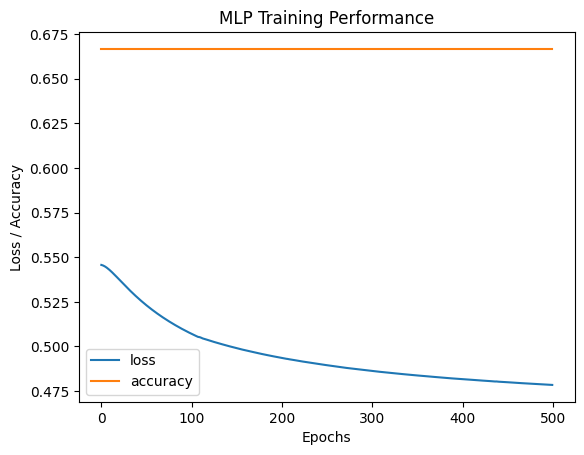

In [13]:
import matplotlib.pyplot as plt

history = model.fit(X, y, epochs=500, verbose=0, validation_split=0.2)

# Plot training loss and accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('MLP Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()


Q2:Sentiment Analysis Twitter Airline

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [45]:

df = pd.read_csv('/content/Tweets - Tweets.csv')
df = df[['text', 'airline_sentiment']]

In [49]:

# Preprocessing - Label encoding: positive as 1 and negative as 0
df['label'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
# Tokenizing and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])

In [50]:
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)  # Set max length of tweet to 100 words
y = df['label'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(16, input_shape=(100,), activation=activation))  # First hidden layer
    model.add(Dense(8, activation=activation))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer (for binary classification)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [53]:
# Create the model with desired activation function
model = create_model(activation='relu')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:

# Train the model with backpropagation
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6333 - loss: 14.9082 - val_accuracy: 0.8251 - val_loss: 1.0865
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8259 - loss: 0.8139 - val_accuracy: 0.8378 - val_loss: 0.5824
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.5375 - val_accuracy: 0.8415 - val_loss: 0.4954
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.4874 - val_accuracy: 0.8412 - val_loss: 0.4705
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.4693 - val_accuracy: 0.8415 - val_loss: 0.4557
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8412 - loss: 0.4478 - val_accuracy: 0.8422 - val_loss: 0.4520
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8330 - loss: 0.4551 - val_accuracy: 0.8415 - val_loss: 0.4446
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8433 - loss: 0.4365 - val_accuracy: 0

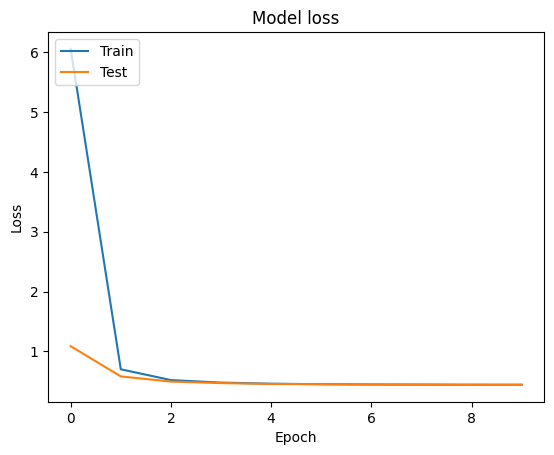

In [55]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

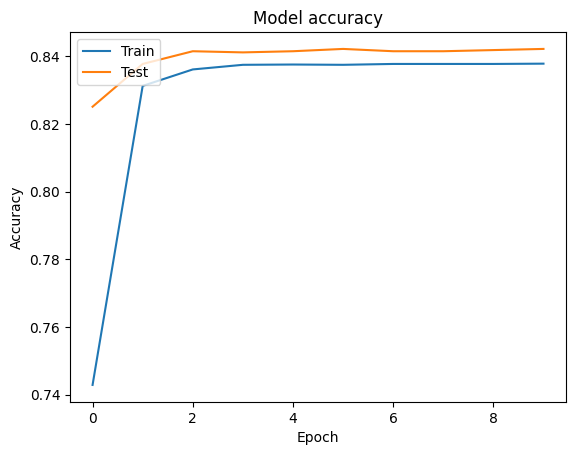

In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [57]:

# Try sigmoid activation
model_sigmoid = create_model(activation='sigmoid')
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7925 - loss: 0.5284 - val_accuracy: 0.8432 - val_loss: 0.4243
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.4375 - val_accuracy: 0.8432 - val_loss: 0.4215
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8405 - loss: 0.4275 - val_accuracy: 0.8432 - val_loss: 0.4175
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8443 - loss: 0.4187 - val_accuracy: 0.8432 - val_loss: 0.4140
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8375 - loss: 0.4262 - val_accuracy: 0.8432 - val_loss: 0.4125
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8292 - loss: 0.4379 - val_accuracy: 0.8432 - val_loss: 0.4095
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8339 - loss: 0.4292 - val_accuracy: 0.8432 - val_loss: 0.4084
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8394 - loss: 0.4217 - val_accuracy: 0.

In [58]:
# Try tanh activation
model_tanh = create_model(activation='tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6757 - loss: 0.5969 - val_accuracy: 0.8422 - val_loss: 0.4283
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8428 - loss: 0.4270 - val_accuracy: 0.8436 - val_loss: 0.4212
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8386 - loss: 0.4260 - val_accuracy: 0.8432 - val_loss: 0.4197
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8361 - loss: 0.4280 - val_accuracy: 0.8432 - val_loss: 0.4178
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8316 - loss: 0.4377 - val_accuracy: 0.8432 - val_loss: 0.4161
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.4250 - val_accuracy: 0.8429 - val_loss: 0.4148
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8347 - loss: 0.4305 - val_accuracy: 0.8391 - val_loss: 0.4162
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8303 - loss: 0.4378 - val_accuracy: 0.

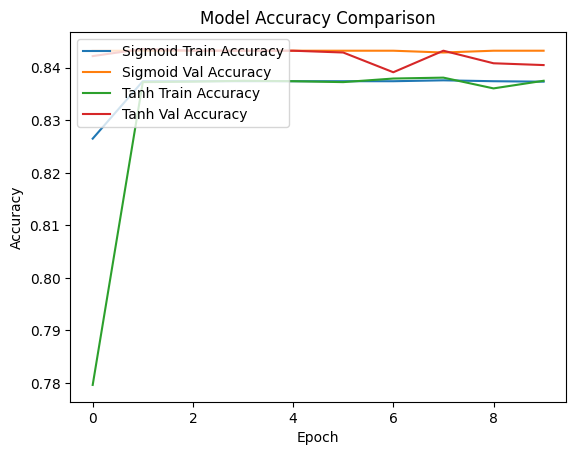

In [59]:
# Plot sigmoid model loss and accuracy
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid Train Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Val Accuracy')
plt.plot(history_tanh.history['accuracy'], label='Tanh Train Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

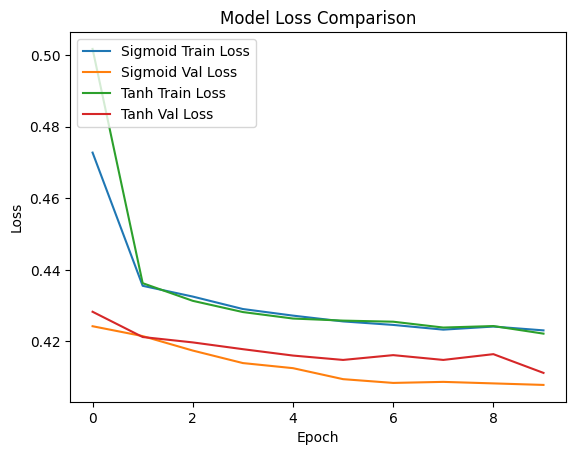

In [60]:
# Similarly, for loss
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Train Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Val Loss')
plt.plot(history_tanh.history['loss'], label='Tanh Train Loss')
plt.plot(history_tanh.history['val_loss'], label='Tanh Val Loss')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [61]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8368 - loss: 0.4458
Test Accuracy: 0.8422
